# 2015 DATA USED

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2015
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('gdp.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('life.csv')
lifeReset.head()

,Country Name,Indicator Code,2015
0,Aruba,SP.DYN.LE00.IN,75.725
1,Afghanistan,SP.DYN.LE00.IN,63.377
2,Angola,SP.DYN.LE00.IN,59.398
3,Albania,SP.DYN.LE00.IN,78.025
4,Andorra,SP.DYN.LE00.IN,NaN


In [3]:
gdpCountries = gdpReset[34:].dropna()
lifeCountries = lifeReset[34:].dropna()

In [10]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries['2015'
].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,Country Name,2015,Indicator Code,GDP (£m)
34,Central Europe and the Baltics,1.290000e+12,NY.GDP.MKTP.CD,824403
35,Switzerland,6.800000e+11,NY.GDP.MKTP.CD,434569
37,Chile,2.440000e+11,NY.GDP.MKTP.CD,155934
38,China,1.110000e+13,NY.GDP.MKTP.CD,7093703
39,Cote d'Ivoire,4.581464e+10,NY.GDP.MKTP.CD,29279


In [13]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
34,Central Europe and the Baltics,824403
35,Switzerland,434569
37,Chile,155934
38,China,7093703
39,Cote d'Ivoire,29279


In [16]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries['2015'].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,Country Name,Life expectancy (years)
34,Central Europe and the Baltics,77
35,Switzerland,83
36,Channel Islands,82
37,Chile,80
38,China,76


In [19]:
gdpVsLife = gdpClean.merge(lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Central Europe and the Baltics,824403,77
1,Switzerland,434569,83
2,Chile,155934,80
3,China,7093703,76
4,Cote d'Ivoire,29279,56


In [20]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.3012659450383708
It is statistically significant.


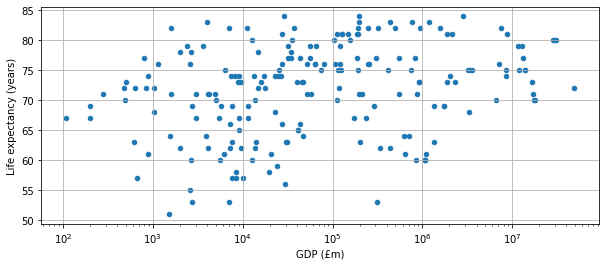

In [21]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [22]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,Country Name,GDP (£m),Life expectancy (years)
81,Kiribati,109,67
39,"Micronesia, Fed. Sts.",202,67
164,Sao Tome and Principe,202,69
182,Tonga,279,71
195,St. Vincent and the Grenadines,483,72
198,Vanuatu,485,70
200,Samoa,504,73
9,Comoros,617,63
49,Grenada,637,72
46,Guinea-Bissau,670,57


In [23]:
# the 10 countries with lowest life expectancy
gdpVsLife.sort_values(LIFE).head(10)

,Country Name,GDP (£m),Life expectancy (years)
97,Lesotho,1516,51
125,Nigeria,311228,53
172,Chad,6998,53
157,Sierra Leone,2696,53
169,Eswatini,2596,55
4,Cote d'Ivoire,29279,56
161,South Sudan,7667,57
47,Equatorial Guinea,8426,57
117,Mozambique,10194,57
46,Guinea-Bissau,670,57
